# Лабораторная работа 3

Классификация в sklearn. Метрики классификации

Выполнил Клионкин В.С., группа 6132

*Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.*

In [3]:
import numpy as np
import pandas as pd

In [53]:
heart_disease_df = pd.read_csv("./heart_2020_cleaned.csv")
heart_disease_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [31]:
music_genre_df = pd.read_csv("./music_genre.csv").drop(['instance_id'], axis=1).dropna().reset_index(drop=True)
music_genre_df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
49996,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
49997,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
49998,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [15]:
music_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  object 
 1   track_name        50000 non-null  object 
 2   popularity        50000 non-null  float64
 3   acousticness      50000 non-null  float64
 4   danceability      50000 non-null  float64
 5   duration_ms       50000 non-null  float64
 6   energy            50000 non-null  float64
 7   instrumentalness  50000 non-null  float64
 8   key               50000 non-null  object 
 9   liveness          50000 non-null  float64
 10  loudness          50000 non-null  float64
 11  mode              50000 non-null  object 
 12  speechiness       50000 non-null  float64
 13  tempo             50000 non-null  object 
 14  obtained_date     50000 non-null  object 
 15  valence           50000 non-null  float64
 16  music_genre       50000 non-null  object

### 1. Многоклассовая классификация

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [33]:
music_le = LabelEncoder()
music_le.fit(music_genre_df['music_genre'])
#list(music_le.classes_)
music_genre_id_column_df = pd.DataFrame({'music_genre_id': music_le.transform(music_genre_df['music_genre'])})
music_genre_id_column_df

,music_genre_id
0,5
1,5
2,5
3,5
4,5
...,...
49995,6
49996,6
49997,6
49998,6


In [35]:
y = music_genre_id_column_df['music_genre_id']
X = music_genre_df.select_dtypes(exclude=['object'])
music_genre_without_cat_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,0.759
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,0.531
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,0.333
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,0.270
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,0.323
...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0.2980,0.330
49996,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0.0550,0.113
49997,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0.1460,0.395
49998,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0.0441,0.354


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [37]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

Accuracy: 0.438


In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(decision_tree, X, y, cv=5)
print("Mean score:", np.mean(scores), "Stddev:", np.std(scores))

Mean score: 0.433 Stddev: 0.004437566900904145


<AxesSubplot:xlabel='max_depth'>

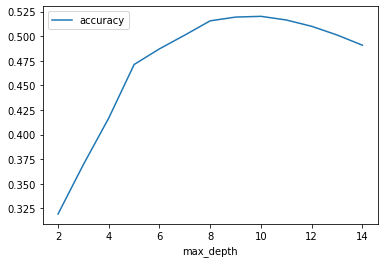

In [46]:
depth_range = range(2, 15)
accuracies = []
for i in depth_range:
    cl = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(cl, X, y, cv=3)
    accuracies.append(np.mean(scores))
dtree_df = pd.DataFrame(data={"max_depth": depth_range, "accuracy": accuracies})
dtree_df.plot.line(x="max_depth", y="accuracy")

<AxesSubplot:>

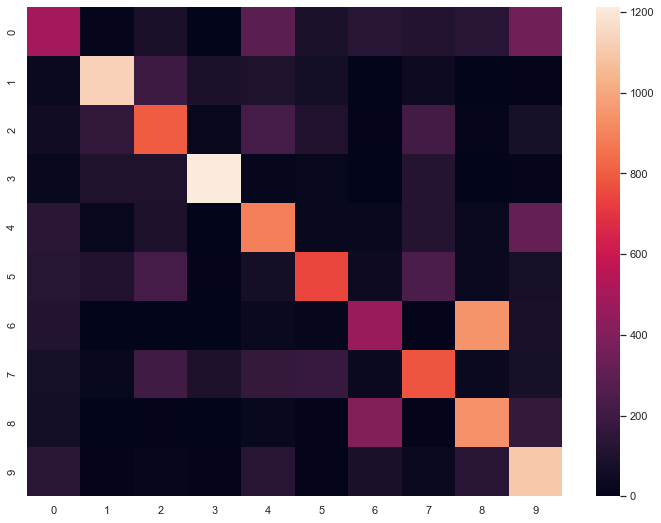

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(12,9)}) # задаем настройки размера изображений

decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix)

In [60]:
heart_disease_numeric_df = heart_disease_df.copy()
heart_disease_former_cat_title_list = list(heart_disease_numeric_df.select_dtypes(include='object'))
for l in heart_disease_former_cat_title_list:
    heart_le = LabelEncoder()
    heart_le.fit(heart_disease_numeric_df[l])
    heart_disease_numeric_df[l].replace(heart_le.classes_, heart_le.transform(heart_le.classes_), inplace=True)
heart_disease_numeric_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [61]:
y = heart_disease_numeric_df['HeartDisease']
X = heart_disease_numeric_df.drop(columns=["HeartDisease"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [62]:
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn.neural_network import MLPClassifier

cl = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred = cl.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9158367524850047
Precision: 0.5560235888795282
Recall: 0.07321131447587355
F1-score: 0.1293863948245442
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     96518
           1       0.56      0.07      0.13      9015

    accuracy                           0.92    105533
   macro avg       0.74      0.53      0.54    105533
weighted avg       0.89      0.92      0.89    105533



In [63]:
def print_metrics(model, features, labels) -> (float, float):
    print("=" * 100)
    accuracy_list = cross_val_score(model, features, labels, cv=5)
    print(f"Accuracy: {np.mean(accuracy_list)} ({np.std(accuracy_list)})")

    if len(np.unique(labels)) == 2:
        features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.5, random_state=0)
        model.fit(features_train, labels_train)
        labels_pred = model.predict(features_test)
        print(f"Precision: {precision_score(labels_test, labels_pred)}")
        print(f"Recall: {recall_score(labels_test, labels_pred)}")
        print(f"F1-score: {f1_score(labels_test, labels_pred)}")
        print(f"Classification report:\n{classification_report(labels_test, labels_pred)}")
    print("=" * 100)


X_multi = music_genre_df.select_dtypes(exclude=['object'])
y_multi = music_genre_id_column_df['music_genre_id']

X_bin = heart_disease_numeric_df.drop(columns=["HeartDisease"], axis=1)
y_bin = heart_disease_numeric_df['HeartDisease']

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_standard_multi = standard_scaler.fit_transform(X_multi)
X_min_max_multi = min_max_scaler.fit_transform(X_multi)

X_standard_bin = standard_scaler.fit_transform(X_bin)
X_min_max_bin = min_max_scaler.fit_transform(X_bin)

In [65]:
dtree = DecisionTreeClassifier()

print("Метрики мультиклассовой классификации без применения нормализации")
print_metrics(dtree, X_multi, y_multi)
print("Метрики мультиклассовой классификации с применением StanardScaler")
print_metrics(dtree, X_standard_multi, y_multi)
print("Метрики мультиклассовой классификации с применением MinMaxScaler")
print_metrics(dtree, X_min_max_multi, y_multi)

print("Метрики бинарной классификации без применения нормализации")
print_metrics(dtree, X_bin, y_bin)
print("Метрики бинарной классификации с применением StanardScaler")
print_metrics(dtree, X_standard_bin, y_bin)
print("Метрики бинарной классификации с применением MinMaxScaler")
print_metrics(dtree, X_min_max_bin, y_bin)

Метрики мультиклассовой классификации без применения нормализации
Accuracy: 0.43418 (0.004082842147328248)
Метрики мультиклассовой классификации с применением StanardScaler
Accuracy: 0.43448000000000003 (0.004982930864461196)
Метрики мультиклассовой классификации с применением MinMaxScaler
Accuracy: 0.43229999999999996 (0.0053141321022345655)
Метрики бинарной классификации без применения нормализации
Accuracy: 0.8641098203536641 (0.0022702474209228348)
Precision: 0.22971830069611607
Recall: 0.2592511013215859
F1-score: 0.24359283915697974
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92    146278
           1       0.23      0.26      0.24     13620

    accuracy                           0.86    159898
   macro avg       0.58      0.59      0.58    159898
weighted avg       0.87      0.86      0.87    159898

Метрики бинарной классификации с применением StanardScaler
Accuracy: 0.8641973764442845 (0.00232379474799